In [ ]:
#Roll No : M23CSA001
#Speech Understanding
#Assignment 1
#Ques 2 - Task B

In [2]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
class MusicSpectrogramAnalyzer:
    def __init__(self, audio_files):
        self.audio_files = audio_files

    def load_audio(self, audio_path):
        try:
            y, sr = librosa.load(audio_path, sr=None)
            return y, sr
        except Exception as e:
            print(f"Error loading audio file {audio_path}: {e}")
            return None, None

    def compute_spectrogram(self, y, sr):
        D = librosa.stft(y)
        D_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
        return D_db

    def extract_features(self, y, sr):
        features = {
            'spectral_centroid': librosa.feature.spectral_centroid(y=y, sr=sr)[0],
            'spectral_bandwidth': librosa.feature.spectral_bandwidth(y=y, sr=sr)[0],
            'spectral_rolloff': librosa.feature.spectral_rolloff(y=y, sr=sr)[0],
        }
        return features

    def plot_spectrogram(self, D_db, sr, title):
        plt.figure(figsize=(12, 6))
        librosa.display.specshow(D_db, sr=sr, x_axis='time', y_axis='log')
        plt.colorbar(format='%+2.0f dB', label='Magnitude (dB)')
        plt.title(f'Spectrogram: {title}', fontsize=16)
        plt.xlabel("Time (s)", fontsize=12)
        plt.ylabel("Frequency (Hz)", fontsize=12)
        plt.tight_layout()
        plt.show()

    def plot_feature_comparison(self, feature_dict):
        plt.figure(figsize=(15, 5))
        feature_names = ['spectral_centroid', 'spectral_bandwidth', 'spectral_rolloff']

        for i, feature in enumerate(feature_names, 1):
            plt.subplot(1, 3, i)
            sns.boxplot(data=[feature_dict[genre][feature] for genre in feature_dict.keys()])
            plt.title(f'{feature.replace("_", " ").title()}')
            plt.xticks(range(len(feature_dict)), list(feature_dict.keys()), rotation=45)

        plt.tight_layout()
        plt.show()

    def analyze_spectrograms(self):
        feature_dict = {}

        for title, file_path in self.audio_files.items():
            y, sr = self.load_audio(file_path)
            if y is None:
                continue

            D_db = self.compute_spectrogram(y, sr)

            self.plot_spectrogram(D_db, sr, title)

            features = self.extract_features(y, sr)
            feature_dict[title] = features

        self.plot_feature_comparison(feature_dict)

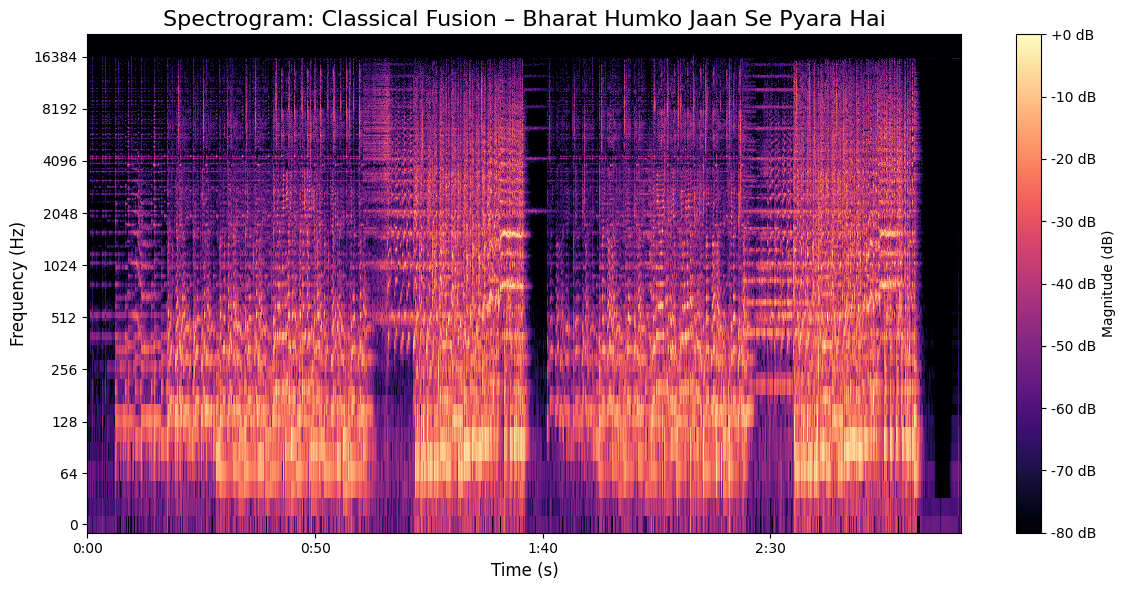

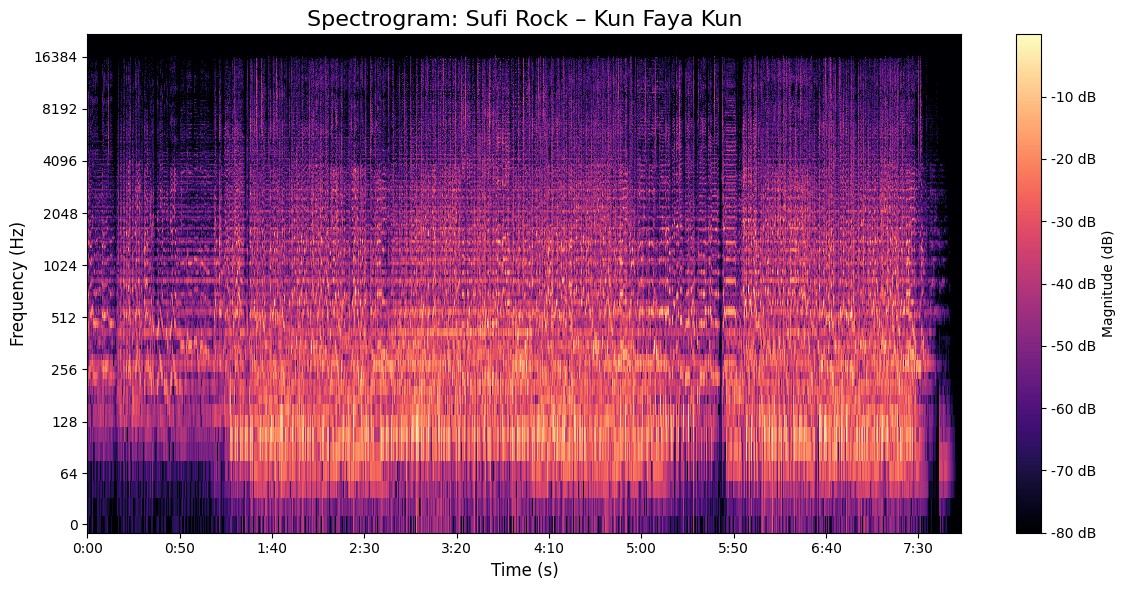

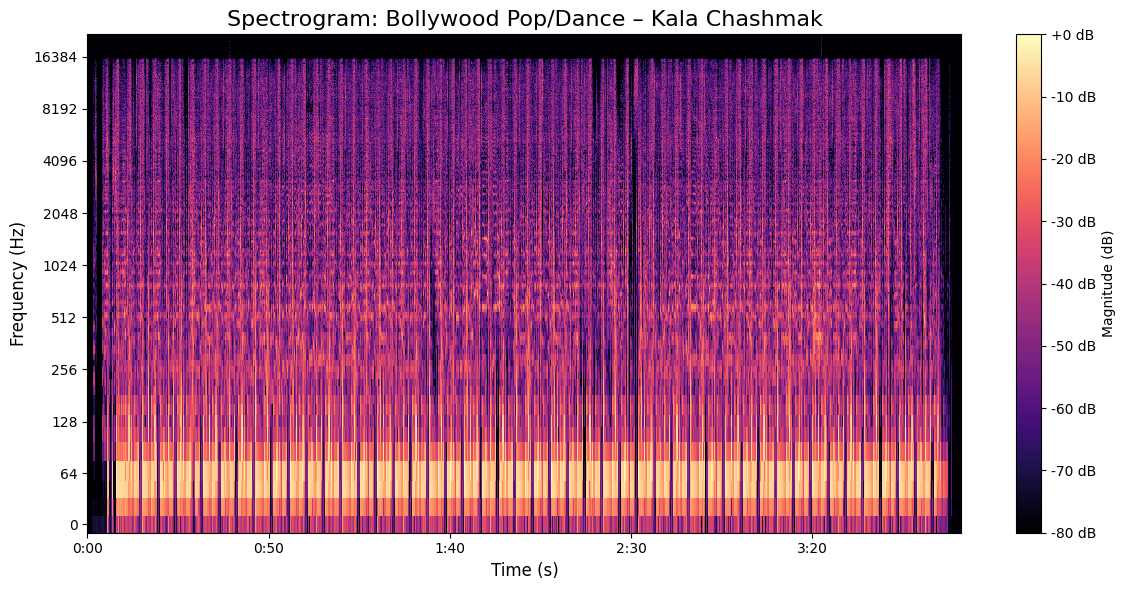

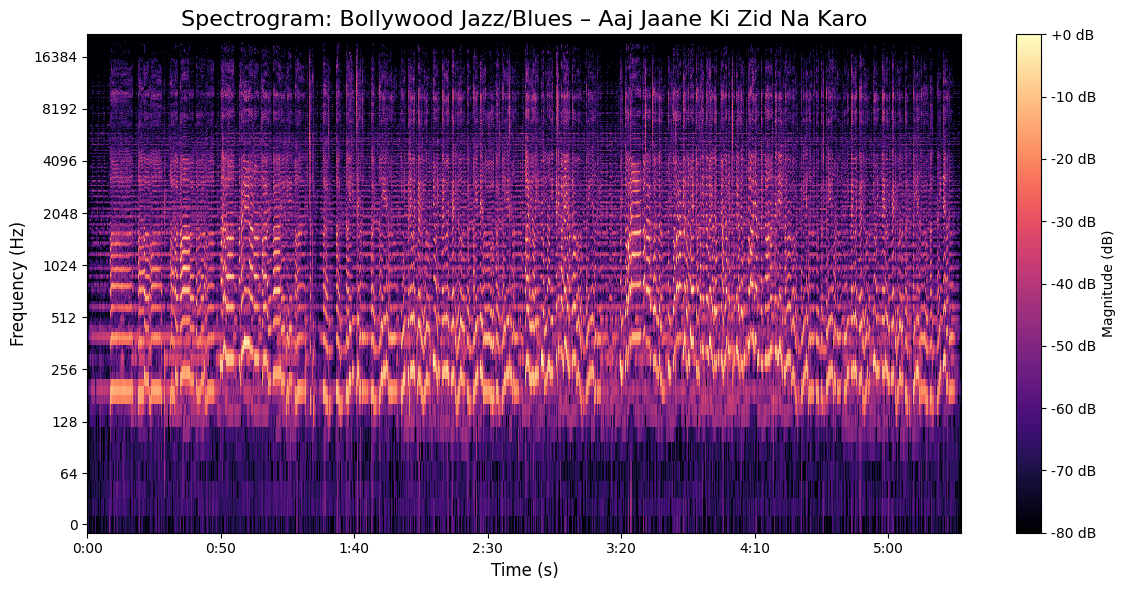

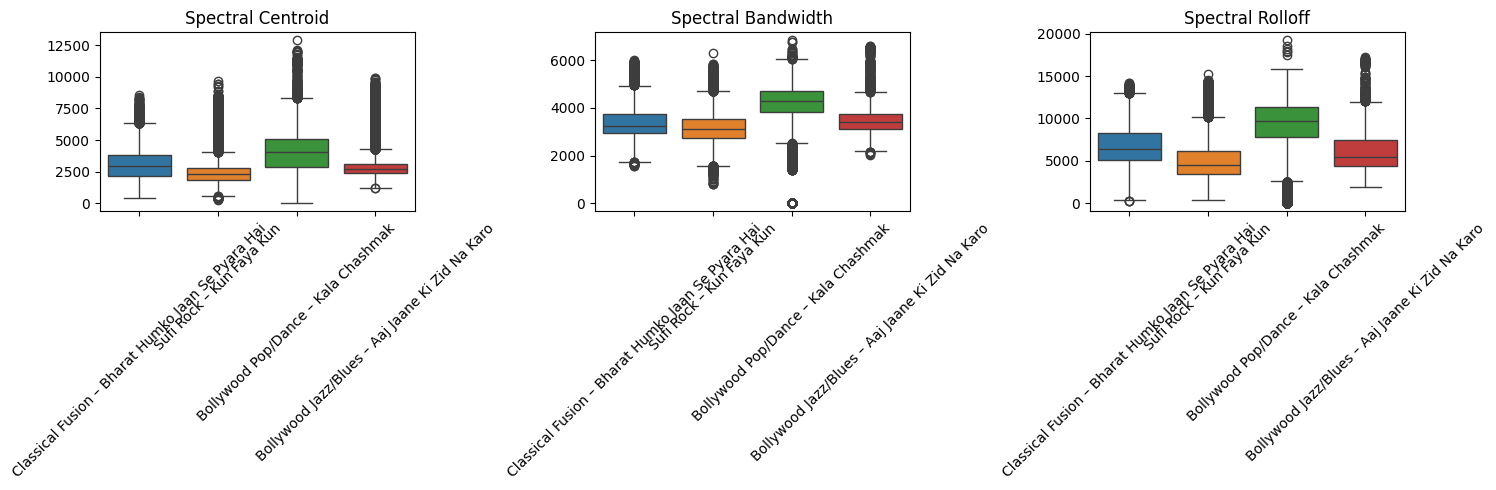

In [4]:
audio_files = {
    "Classical Fusion – Bharat Humko Jaan Se Pyara Hai" : "/content/drive/MyDrive/Speech_Understanding/Assignment_1/Ques2_TaskB/Bharat Humko Jaan Se Pyara Hai - Roja 320 Kbps.mp3",
    "Sufi Rock – Kun Faya Kun": "/content/drive/MyDrive/Speech_Understanding/Assignment_1/Ques2_TaskB/Kun Faaya Kun - Rockstar 320 Kbps.mp3",
    "Bollywood Pop/Dance – Kala Chashmak": "/content/drive/MyDrive/Speech_Understanding/Assignment_1/Ques2_TaskB/Tainu Kala Chashma - JSL.mp3",
    "Bollywood Jazz/Blues – Aaj Jaane Ki Zid Na Karo": "/content/drive/MyDrive/Speech_Understanding/Assignment_1/Ques2_TaskB/Aaj Jaane Ki Zidd Na Karo - Bhopal Express 320 Kbps.mp3"
}

analyzer = MusicSpectrogramAnalyzer(audio_files)
analyzer.analyze_spectrograms()